In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data.csv")

df["predicted_RF"] = (df["model_RF"] >= 0.5).astype("int")
df["predicted_LR"] = (df["model_LR"] >= 0.5).astype("int")

df.head()


,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [2]:
def confusion_matrix(y_true, y_predicted):
    u = np.unique(y_true)
    Matrix = [[0 for x in range(len(u))] for y in range(len(u))] 
    for i in range(len(y_true)):
        Matrix[y_true[i]][y_predicted[i]] += 1
    return np.array(Matrix)

confusion_matrix(df['actual_label'], df['predicted_RF'])


array([[5519, 2360],
       [2832, 5047]])

In [3]:
def accuracy_score(y_true, y_predicted):
    matrix = confusion_matrix(y_true, y_predicted)
    x = np.asarray(matrix)
    return np.trace(x) / np.sum(x)


accuracy_score(df["actual_label"], df["predicted_RF"])


0.6705165630156111

In [4]:
def precision_score(y_true, y_predicted):
    tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
    precision = tp / (tp + fp)
    return precision

precision_score(df["actual_label"], df["predicted_RF"])

0.681382476036182

In [5]:
def recall_score(y_true, y_predicted):
    tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
    recall = tp / (tp + fn)
    return recall

recall_score(df["actual_label"], df["predicted_RF"])

0.6405635232897576

In [6]:
def specificity_score(y_true, y_predicted):
    tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
    specificity = tn / (tn + fp)
    return specificity

specificity_score(df["actual_label"], df["predicted_RF"])

0.7004696027414646

In [7]:
def f1_score(y_true, y_predicted):
    precision = precision_score(y_true, y_predicted)
    recall = recall_score(y_true, y_predicted)
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

f1_score(df["actual_label"], df["predicted_RF"])

0.660342797330891

In [8]:
def roc_auc_score(y_true, y_predicted):
    recall = recall_score(y_true, y_predicted)
    fpr = 1 - specificity_score(y_true, y_predicted)

    return 1 / 2 - fpr / 2 + recall / 2

roc_auc_score(df["actual_label"], df["predicted_RF"])

0.6705165630156111

In [9]:
def roc_curve(y_true, y_predicted):
    thresh = 0
    points = []
    while thresh <= 1:
        predicted = (y_predicted >= thresh).astype('int')
        fpr = 1 - specificity_score(y_true, predicted)
        tpr = recall_score(y_true, predicted)
        points.append((fpr, tpr))
        thresh += 0.1
    return points

roc_curve(df['actual_label'], df['model_RF'])

[(1.0, 1.0),
 (1.0, 1.0),
 (0.9994923213605788, 1.0),
 (0.9780428988450312, 0.9987308034014469),
 (0.7550450564792486, 0.9406015991877141),
 (0.29953039725853536, 0.6405635232897576),
 (0.05863688285315394, 0.28417311841604265),
 (0.0038075897956593163, 0.06333291026780048),
 (0.0, 0.009392054829293058),
 (0.0, 0.000634598299276558),
 (0.0, 0.0)]

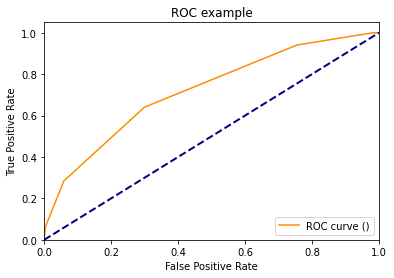

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
lw = 2
array = roc_curve(df.actual_label, df.model_RF)
fpr = [x[0] for x in array]
tpr = [x[1] for x in array]
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (%s)' % str())
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc="lower right")
plt.show()